# SVM Model

Notes: 
- Trying SVM with a Linear kernal, RBF, and Poly. 
- Class weight dramtically reduces accuracy across the board. 

Final trial includes the probabilty set to True. This produces an interesting result as it shares the actual probility of each class in the prediction. Could be a more useful story in the results. 

Current predcitions with parameters create a 7% accuracy. 

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import itertools
import matplotlib.pyplot as plt
from citibike_scripts_derrick import show_cf, svm_function, svc_param_selection  
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [37]:
df = pd.read_csv('citibike_data/citibike_2018.csv')

In [56]:
df_small = df.sample(15000)

Split variables from targets: 

In [57]:
labels = df_small.stop_nhbr
labels_removed_df = df_small.drop('stop_nhbr', axis=1)

Scale data: 

In [58]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(labels_removed_df.astype(float))

Split data into training and testing sets.  Maintain at least some of each target class in both sets with the 'stratify' argument. 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, labels)

### Fit Linear SVM model: 

- Class_weight set to 'balanced' produced results of 0.53%

In [60]:
svc_param_selection(X_train, y_train, 2, 'linear')

{'C': 1, 'gamma': 0.001}

Training Accuracy: 7.271%
Validation accuracy: 6.053%


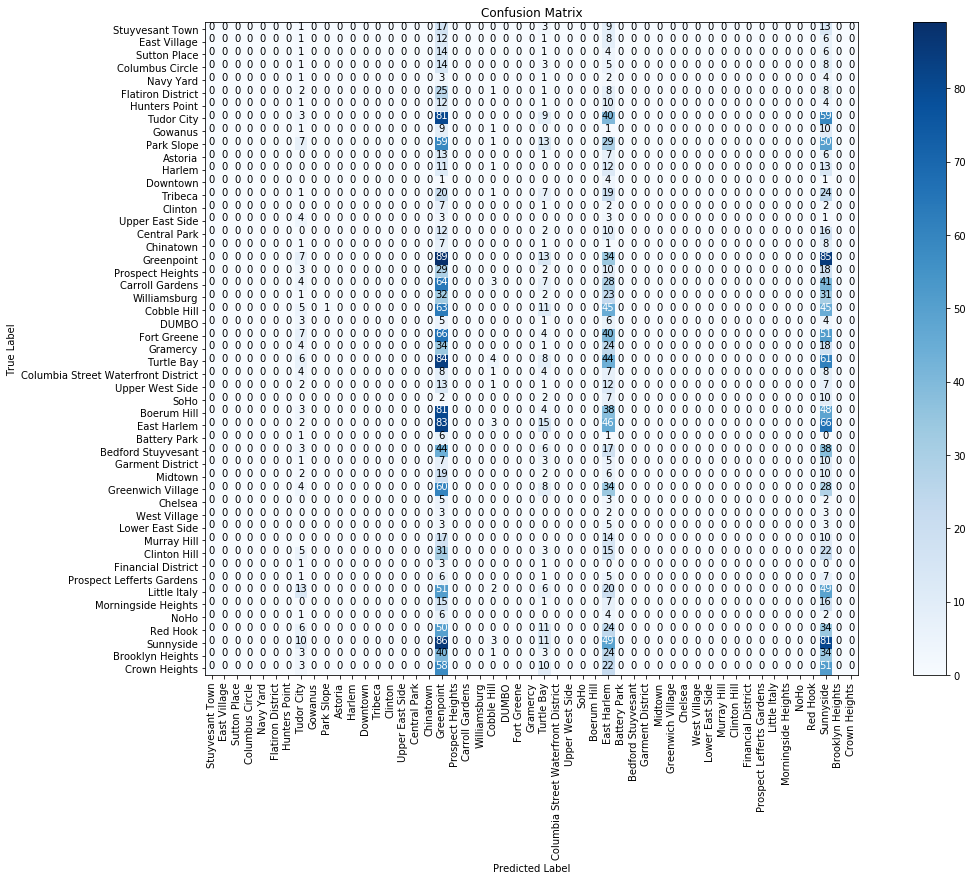

In [ ]:
svm_function(X_train, y_train, X_test, y_test, kern='linear', gamma1=1, rand=42, c1=1)

### Fit RBF SVM model: 

- Class_weight set to 'balanced' produced results of .6%

In [ ]:
svc_param_selection(X_train, y_train, 4, 'rbf')

In [ ]:
svm_function(X_train, y_train, X_test, y_test, kern='rbf', gamma1=.1, rand=42, c1=1)

### Fit Poly SVM Model

- Class_weight set to 'balanced' produced results of 1%

In [ ]:
svc_param_selection(X_train, y_train, 3, 'poly')

In [ ]:
svm_function(X_train, y_train, X_test, y_test, kern='poly', gamma1=.001, rand=42, c1=.001)

### SVM with Probabilities: 

An interesting story to view probabilities of the final prediction. 

In [ ]:
clf_prob = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, 
                    shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, 
                    verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=42)

In [ ]:
clf_prob.fit(X_train, y_train)

In [ ]:
training_preds = clf_prob.predict_proba(X_train )

In [ ]:
test_preds = clf_prob.predict_proba(X_test)

In [ ]:
probibilities = pd.DataFrame(test_preds, columns = clf_prob.classes_)

In [ ]:
probibilities